In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.palettes import Category10
from collections import Counter

19355_gene_by_cell.csv	19885_gene_by_cell.csv	20062_gene_by_cell.csv
19384_gene_by_cell.csv	19935_gene_by_cell.csv	20089_gene_by_cell.csv
19477_gene_by_cell.csv	19963_gene_by_cell.csv	20143_gene_by_cell.csv
19844_gene_by_cell.csv	20024_gene_by_cell.csv	20172_gene_by_cell.csv

In [2]:
scDNA = pd.read_csv('scDNA_gene_by_cell.csv', sep='\t')
scDNA = scDNA.fillna(0)
# scDNA = scDNA[scDNA.iloc[:, 5:].apply(np.sum,axis=1)!=0]
scDNA

,chromosome_name,start_position,end_position,ensembl_gene_id,hgnc_symbol,20172,9318,3122,5649,20153,...,19355,19384,19477,5262,19844,20027,20062,20096,20123,20149
0,1,14404,29570,ENSG00000227232,WASH7P,3.753906,0.000000,0.0,9.765625,6.0,...,2.000000,1.871094,1.386719,2.0,1.375000,1.625,1.0,2.039062,2.0,0.019531
1,1,868071,876903,ENSG00000230368,FAM41C,3.753906,0.000000,0.0,9.765625,6.0,...,2.000000,1.871094,1.386719,2.0,1.375000,1.625,1.0,2.039062,2.0,0.019531
2,1,944204,959309,ENSG00000188976,NOC2L,3.753906,0.000000,0.0,9.765625,6.0,...,2.000000,1.871094,1.386719,2.0,1.375000,1.625,1.0,2.039062,2.0,0.019531
3,1,1001138,1014541,ENSG00000187608,ISG15,3.753906,0.000000,0.0,9.765625,6.0,...,2.000000,1.871094,1.386719,2.0,1.375000,1.625,1.0,2.039062,2.0,0.019531
4,1,1020123,1056118,ENSG00000188157,AGRN,3.753906,0.000000,0.0,9.765625,6.0,...,2.000000,1.871094,1.386719,2.0,1.375000,1.625,1.0,2.039062,2.0,0.019531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9165,23,155025980,155060303,ENSG00000165775,FUNDC2,5.886719,11.851562,10.0,0.000000,5.0,...,1.984375,1.914062,1.984375,2.0,1.902344,1.000,1.0,1.609375,2.0,1.804688
9166,23,155061622,155071362,ENSG00000182712,CMC4,5.886719,11.851562,10.0,0.000000,5.0,...,1.984375,1.914062,1.984375,2.0,1.902344,1.000,1.0,1.609375,2.0,1.804688
9167,23,155197007,155239817,ENSG00000155959,VBP1,5.886719,11.851562,10.0,0.000000,5.0,...,1.984375,1.914062,1.984375,2.0,1.902344,1.000,1.0,1.609375,2.0,1.804688
9168,23,155490115,155669944,ENSG00000185973,TMLHE,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0,0.000000,0.0,0.000000


In [3]:
def preprocess(f, clnm):
    cluFile = pd.read_csv(f, sep=',', index_col=0)
    cluFile = cluFile.fillna(0)
    cluFile = cluFile[cluFile.iloc[:, 5:].apply(np.sum,axis=1)!=0]
    colName = cluFile['hgnc_symbol']
    cluFile = cluFile.iloc[:, 5:].T
    cluFile.columns = colName
    cluFile['cluster'] = np.repeat(clnm, cluFile.shape[0])
    print(cluFile.shape[0])
    return cluFile

In [4]:
cluster = preprocess('cluster_gene_by_cell/19355_gene_by_cell.csv', '19355')

# for fnm in ['19963', '19384', '20024', '19477', '20089', '19844', '20143', '19885', '20172']:
for fnm in ['19885', '20062','19384', '19935', '20089', '19477', '19963', '20143', '19844', '20024', '20172']:
    tmp = preprocess('cluster_gene_by_cell/'+fnm+'_gene_by_cell.csv', fnm)
    cluster = pd.concat([cluster, tmp], axis=0)
# cluster = cluster.reset_index(drop=True)
print(Counter(cluster.index))
print(len(set(cluster.index)))

32
32
32
32
32
32
32
32
32
32
32
32
Counter({'19339': 1, '19175': 1, '19092': 1, '18821': 1, '18869': 1, '18557': 1, '18186': 1, '18310': 1, '18305': 1, '6449': 1, '7820': 1, '18014': 1, '4848': 1, '17612': 1, '17129': 1, '17207': 1, '17144': 1, '17041': 1, '17314': 1, '17347': 1, '17196': 1, '7465': 1, '17434': 1, '17418': 1, '17836': 1, '17990': 1, '4371': 1, '3004': 1, '18453': 1, '18645': 1, '18613': 1, '18744': 1, '19802': 1, '19693': 1, '8889': 1, '9947': 1, '19200': 1, '19219': 1, '18914': 1, '9177': 1, '19090': 1, '19031': 1, '18950': 1, '18868': 1, '18712': 1, '18715': 1, '18554': 1, '18653': 1, '8730': 1, '18275': 1, '18102': 1, '18037': 1, '18048': 1, '18174': 1, '3807': 1, '9849': 1, '19351': 1, '19272': 1, '19209': 1, '19147': 1, '19359': 1, '19289': 1, '19679': 1, '19644': 1, '20025': 1, '19934': 1, '19937': 1, '4572': 1, '6300': 1, '10029': 1, '8541': 1, '9815': 1, '9458': 1, '3547': 1, '9897': 1, '1279': 1, '8422': 1, '8535': 1, '3175': 1, '4345': 1, '7034': 1, '2401': 

In [5]:
cluster

hgnc_symbol,RP11-206L10.9,FAM41C,NOC2L,PLEKHN1,HES4,ISG15,AGRN,RNF223,C1orf159,TNFRSF18,...,FAM3A,G6PD,IKBKG,DKC1,MPP1,F8A1,F8,FUNDC2,VBP1,cluster
19339,1.847656,1.847656,1.847656,1.847656,1.847656,1.847656,1.847656,1.847656,1.847656,1.847656,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19355
19175,2.226562,2.226562,2.226562,2.226562,2.226562,2.226562,2.226562,2.226562,2.226562,2.226562,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19355
19092,1.792969,1.792969,1.792969,1.792969,1.792969,1.792969,1.792969,1.792969,1.792969,1.792969,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19355
18821,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19355
18869,1.882812,1.882812,1.882812,1.882812,1.882812,1.882812,1.882812,1.882812,1.882812,1.882812,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,19355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19894,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20172
19917,2.832031,2.832031,2.832031,2.832031,2.832031,2.832031,2.832031,2.832031,2.832031,2.832031,...,4.925781,4.925781,4.925781,4.925781,4.925781,4.925781,4.925781,4.925781,4.925781,20172
20094,3.960938,3.960938,3.960938,3.960938,3.960938,3.960938,3.960938,3.960938,3.960938,3.960938,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,20172
20124,1.089844,1.089844,1.089844,1.089844,1.089844,1.089844,1.089844,1.089844,1.089844,1.089844,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20172


In [6]:
cluster.to_csv('scDNA_clu.csv')

In [7]:
scDNA_arr = np.array(cluster.iloc[:, :-1])
print(np.sum(scDNA_arr<=0))
print(np.sum(scDNA_arr>0))
print(np.min(scDNA_arr[scDNA_arr>0]))
# scDNA_arr[scDNA_arr<=0] = 0.00390625
# log_scDNA_arr = np.log(np.sqrt(scDNA_arr)+np.sqrt(scDNA_arr+1))
log_scDNA_arr = np.log(scDNA_arr+1)
log_scDNA_arr.shape

111689
3904951
0.00390625


(384, 10460)

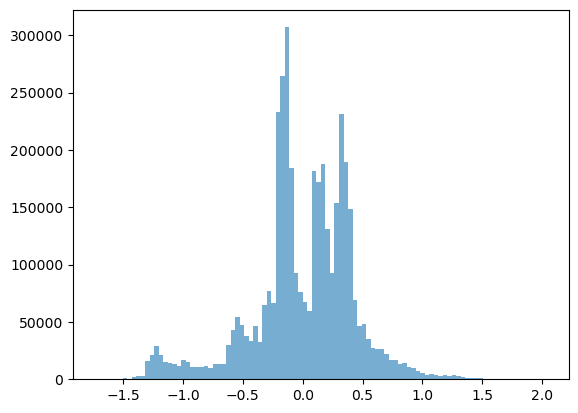

In [8]:
log_scDNA_arr = log_scDNA_arr - log_scDNA_arr.mean(axis=0)
plt.hist(log_scDNA_arr.flatten(), bins = 100, alpha = 0.6);

In [20]:
%%capture
from pydlm import dlm, trend, dynamic, seasonality
smoothedMean = []
for i in range(cluster.shape[0]):
    data = cluster.iloc[i, :-1]
    # plt.plot(data)
    myDLM = dlm(data) + trend(1,discount=0.9)
    myDLM.fit()
    smoothedMean.append(myDLM.getMean(filterType='backwardSmoother'))
    # plt.plot(smoothedMean)

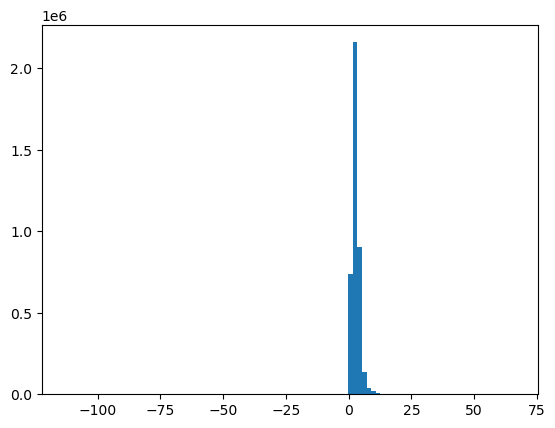

In [21]:
plt.hist(np.array(smoothedMean).flatten(), bins=100);

In [22]:
pd.DataFrame(smoothedMean).to_csv('smoothedMean.csv')

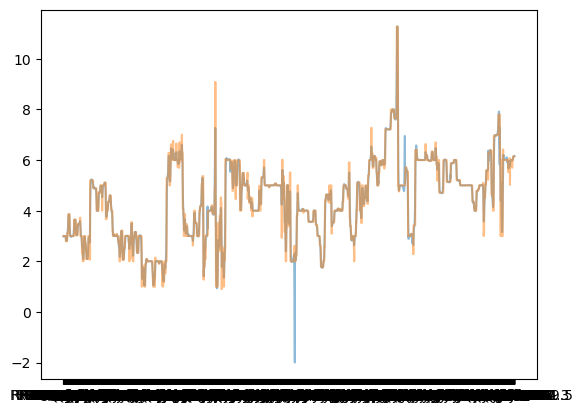

In [23]:
plt.plot(smoothedMean[-1], alpha = 0.5)
plt.plot(data, alpha = 0.5)

In [24]:
log_scDNA_arr.shape

(384, 10460)

In [25]:
log_smoothedMean = np.log(np.array(smoothedMean)+1)

/var/folders/sq/2cxnps7s2n30yvs0mnt35vb40000gq/T/ipykernel_4846/338123320.py:1: RuntimeWarning: invalid value encountered in log
  log_smoothedMean = np.log(np.array(smoothedMean)+1)


(-2.0, 2.0)

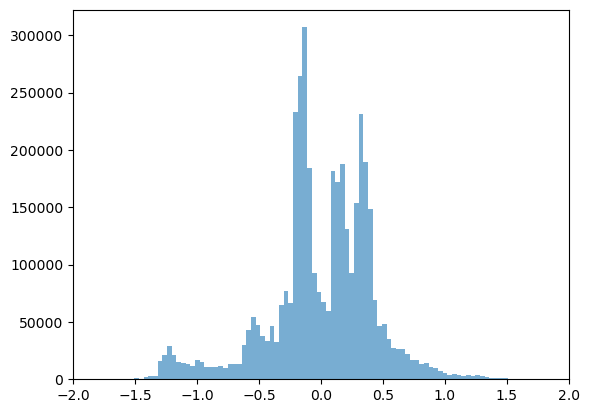

In [30]:
log_scDNA_arr = log_scDNA_arr - np.nanmean(log_scDNA_arr, axis=0)
plt.hist(log_scDNA_arr.flatten(), bins = 100, alpha = 0.6);
plt.xlim(-2, 2)

(-2.0, 2.0)

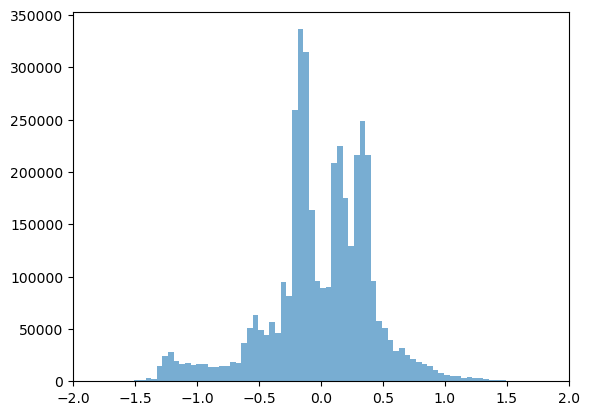

In [31]:
log_smoothedMean = log_smoothedMean - np.nanmean(log_smoothedMean, axis=0)
plt.hist(log_smoothedMean.flatten(), bins = 200, alpha = 0.6);
plt.xlim(-2, 2)

In [19]:
log_smoothedMean

array([[-0.04047962, -0.04037611, -0.0403647 , ..., -0.19150018,
        -0.19148985, -0.19147264],
       [ 0.08417519,  0.08450745,  0.08454405, ..., -0.19150018,
        -0.19148985, -0.19147264],
       [-0.05982684, -0.05976157, -0.05975448, ..., -0.19150018,
        -0.19148985, -0.19147264],
       ...,
       [ 0.51365009,  0.51458316,  0.51468522, ...,  0.65567843,
         0.65566836,  0.65565159],
       [-0.34906223, -0.34966407, -0.34972968, ...,  0.31925516,
         0.31925346,  0.31925065],
       [ 0.2986649 ,  0.29932965,  0.29940277, ...,  0.67628033,
         0.67629846,  0.67632865]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(log_scDNA_arr)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['cluster'] = np.array(cluster['cluster'])
principalDf

,principal component 1,principal component 2,cluster
0,11.700168,-2.736621,19355
1,6.059046,-7.981977,19355
2,14.024027,-2.510614,19355
3,12.359536,-3.048980,19355
4,11.684046,-2.880953,19355
...,...,...,...
379,-40.294281,0.654296,20172
380,-38.120611,0.954349,20172
381,-36.765234,2.017319,20172
382,-25.081896,0.445821,20172


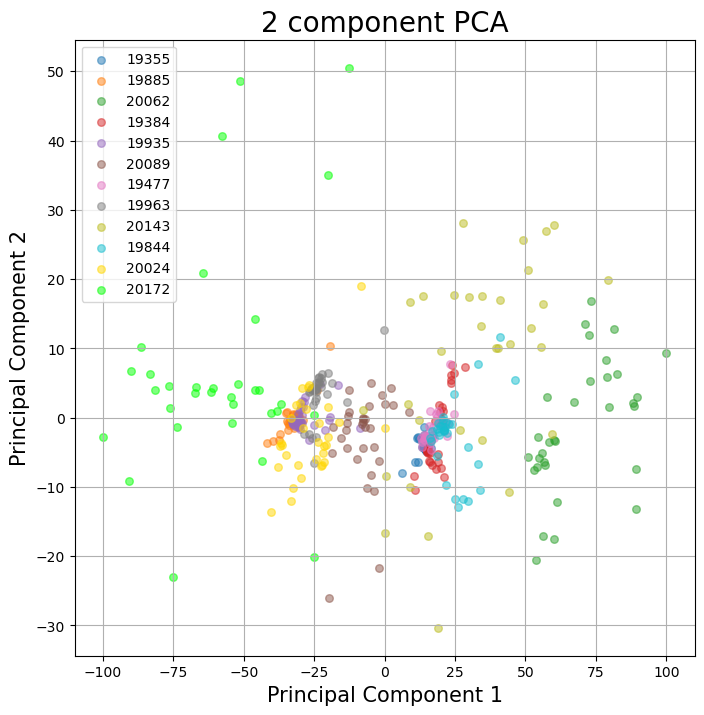

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['19355', '19885', '20062','19384', '19935', '20089', '19477', '19963', '20143', '19844', '20024', '20172']
colors = list(Category10[10])
colors.append('gold')
colors.append('lime')
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['cluster'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , alpha = 0.5
               , s = 30)
ax.legend(targets)
ax.grid()

In [ ]:
ref_gene_set = set(scDNA['hgnc_symbol'])
sel_gene_set = set(cluster.columns[:-1])
inters = list(ref_gene_set&sel_gene_set)
inters.sort()

In [ ]:
sel = inters
sel = np.append(sel, 'cluster')
sel_cluster = cluster.T.reindex(sel).T

In [ ]:
scDNA_diff = scDNA.drop(['19355', '19885', '20062','19384', '19935', '20089', '19477', '19963', '20143', '19844', '20024', '20172'], axis = 1)
colName = scDNA_diff['hgnc_symbol']
scDNA_diff = scDNA_diff.iloc[:, 5:].T
scDNA_diff.columns = colName

In [ ]:
sel_rare = scDNA_diff.T.reindex(inters).T
sel_rare['cluster'] = np.repeat('rare', sel_rare.shape[0])

In [ ]:
sel_df = pd.concat([sel_cluster, sel_rare], axis = 0)

In [ ]:
sel_df = sel_df.fillna(0.00390625)

In [ ]:
sel_scDNA_arr = np.array(sel_df.iloc[:, :-1])
print(np.sum(sel_scDNA_arr<=0))
print(np.sum(sel_scDNA_arr>0))
print(np.min(sel_scDNA_arr[sel_scDNA_arr>0]))
# sel_scDNA_arr[sel_scDNA_arr<=0] = 0.00390625
sel_log_scDNA_arr = np.log(np.array(sel_scDNA_arr)+1)
# sel_log_scDNA_arr.shape

101326
3045834
0.00390625


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sel_scDNA_arr)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['cluster'] = np.array(sel_df['cluster'])
principalDf

,principal component 1,principal component 2,cluster
0,-63.539608,2.356360,19355
1,-49.680868,-8.111537,19355
2,-68.411596,-0.819868,19355
3,-65.630849,-0.975967,19355
4,-63.714146,1.931324,19355
...,...,...,...
399,-75.585165,10.503526,rare
400,-94.569669,-3.820922,rare
401,-115.315504,-7.488894,rare
402,-77.767845,-10.880878,rare


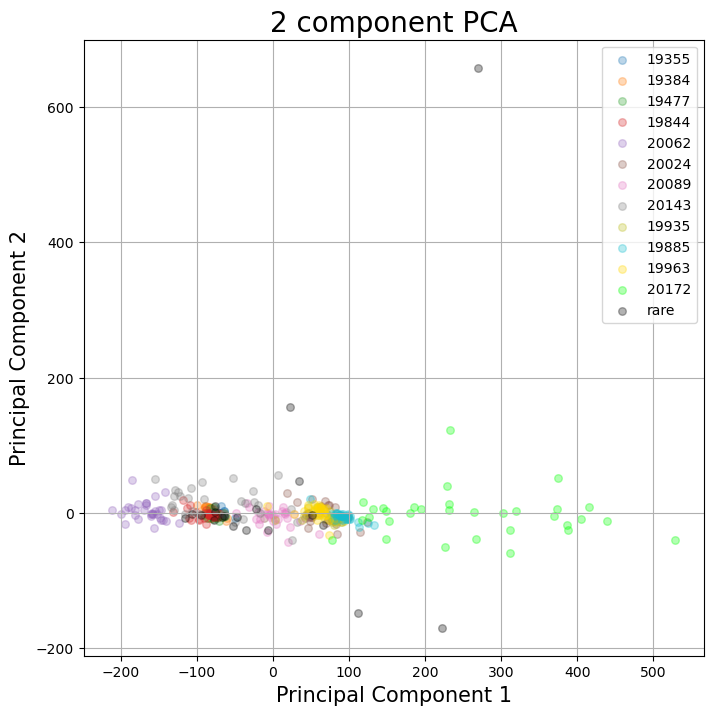

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
# targets = ['19355', '19885', '20062','19384', '19935', '20089', '19477', '19963', '20143', '19844', '20024', '20172', 'rare']
targets = ['19355','19384', '19477', '19844', '20062', '20024', '20089', '20143', '19935', '19885', '19963', '20172', 'rare']
colors = list(Category10[10])
colors.append('gold')
colors.append('lime')
colors.append('black')
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['cluster'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , alpha = 0.3
               , s = 30)
ax.legend(targets)
ax.grid()

In [ ]:
import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(sel_scDNA_arr)
embedding.shape

/Users/ruiqil/miniconda3/envs/COVIDcast/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(404, 2)

In [ ]:
umapDf = pd.DataFrame(data = embedding
             , columns = ['UMAP 1', 'UMAP 2'])
umapDf['cluster'] = np.array(sel_df['cluster'])
umapDf

,UMAP 1,UMAP 2,cluster
0,5.037464,11.063152,19355
1,4.236403,11.080295,19355
2,4.949432,10.709110,19355
3,4.577131,11.096054,19355
4,4.697805,10.834442,19355
...,...,...,...
399,4.981253,7.957242,rare
400,5.739922,13.079412,rare
401,5.840788,12.163415,rare
402,5.078564,11.643266,rare


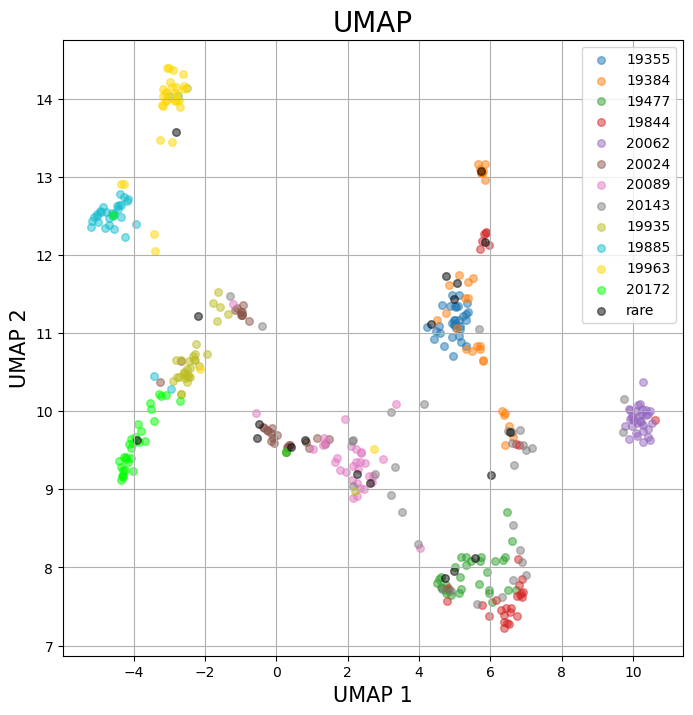

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('UMAP 1', fontsize = 15)
ax.set_ylabel('UMAP 2', fontsize = 15)
ax.set_title('UMAP', fontsize = 20)
# targets = ['19355', '19885', '20062','19384', '19935', '20089', '19477', '19963', '20143', '19844', '20024', '20172', 'rare']
targets = ['19355','19384', '19477', '19844', '20062', '20024', '20089', '20143', '19935', '19885', '19963', '20172', 'rare']
colors = list(Category10[10])
colors.append('gold')
colors.append('lime')
colors.append('black')
for target, color in zip(targets,colors):
    indicesToKeep = umapDf['cluster'] == target
    ax.scatter(umapDf.loc[indicesToKeep, 'UMAP 1']
               , umapDf.loc[indicesToKeep, 'UMAP 2']
               , c = color
               , alpha = 0.5
               , s = 30)
ax.legend(targets)
ax.grid()

In [ ]:
scRNA_CNV = pd.read_csv('copykat_tnbc/tnbc1/test_copykat_CNA_raw_results_gene_by_cell.txt', sep='\t')
scRNA_CNV.head()

,abspos,chromosome_name,start_position,end_position,ensembl_gene_id,hgnc_symbol,band,AAACCTGCACCTTGTC,AAACGGGAGTCCTCCT,AAACGGGTCCAGAGGA,...,TTGTAGGTCTTCAACT,TTTACTGAGGACGAAA,TTTACTGCATGCTAGT,TTTACTGGTACTCGCG,TTTATGCGTAAAGTCA,TTTATGCTCCTCATTA,TTTATGCTCTGTTGAG,TTTCCTCTCGGAAACG,TTTGCGCCAATCACAC,TTTGTCATCTTGTATC
0,794415,1,778770,810060,ENSG00000237491,RP11-206L10.9,p36.33,-0.005465,-0.017076,-0.016983,...,0.054251,-0.082264,0.011443,0.009636,0.101713,-0.001963,-0.060994,0.001017,-0.09234,-0.073653
1,872487,1,868071,876903,ENSG00000230368,FAM41C,p36.33,-0.005465,-0.017076,-0.016983,...,0.054251,-0.082264,0.011443,0.009636,0.101713,-0.001963,-0.060994,0.001017,-0.09234,-0.073653
2,951756,1,944204,959309,ENSG00000188976,NOC2L,p36.33,-0.005465,-0.017076,-0.016983,...,0.054251,-0.082264,0.011443,0.009636,0.101713,-0.001963,-0.060994,0.001017,-0.09234,-0.073653
3,971181,1,966497,975865,ENSG00000187583,PLEKHN1,p36.33,-0.005465,-0.017076,-0.016983,...,0.054251,-0.082264,0.011443,0.009636,0.101713,-0.001963,-0.060994,0.001017,-0.09234,-0.073653
4,999567,1,998962,1000172,ENSG00000188290,HES4,p36.33,-0.005465,-0.017076,-0.016983,...,0.054251,-0.082264,0.011443,0.009636,0.101713,-0.001963,-0.060994,0.001017,-0.09234,-0.073653


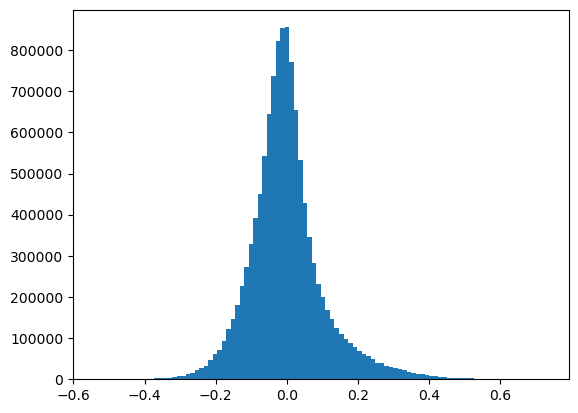

In [ ]:
plt.hist(np.array(scRNA_CNV.iloc[:, 7:]).flatten(), bins = 100);

In [ ]:
log_scDNA_arr.shape

(384, 10460)

In [ ]:
import scipy.spatial.distance as distance
distMat = distance.pdist(np.array(scRNA_CNV.iloc[:, 7:]).T, 'minkowski', p=1.)

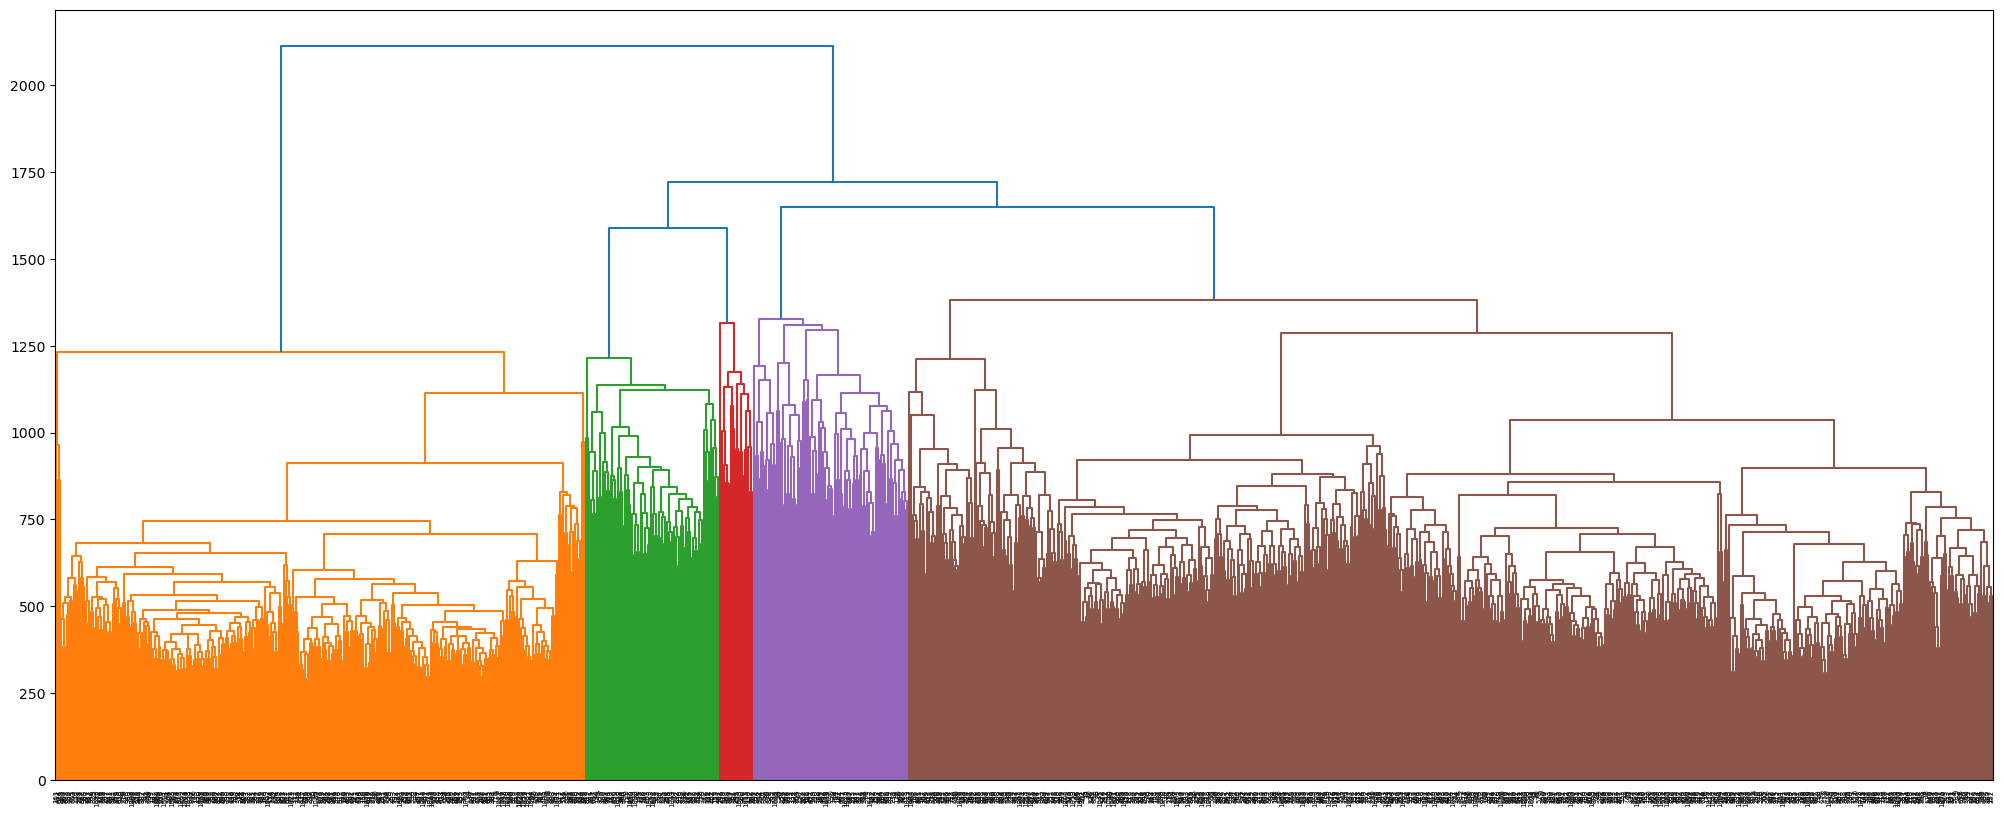

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(distMat, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

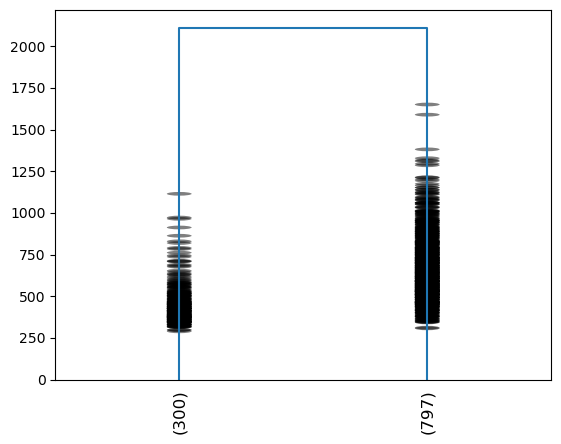

In [ ]:
dendrogram(Z, truncate_mode='lastp', p=2, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 2, criterion='maxclust')
scRNA_pred = pd.read_csv('copykat_tnbc/tnbc1/test_copykat_prediction.txt', sep='\t')
scRNA_pred.head()

,cell.names,copykat.pred
0,AAACCTGCACCTTGTC,aneuploid
1,AAACGGGAGTCCTCCT,diploid
2,AAACGGGTCCAGAGGA,aneuploid
3,AAAGATGCAGTTTACG,aneuploid
4,AAAGCAACAGGAATGC,aneuploid


In [ ]:
scRNA_pred['pred_clu'] = clusters-1
scRNA_pred

,cell.names,copykat.pred,pred_clu
0,AAACCTGCACCTTGTC,aneuploid,1
1,AAACGGGAGTCCTCCT,diploid,0
2,AAACGGGTCCAGAGGA,aneuploid,1
3,AAAGATGCAGTTTACG,aneuploid,1
4,AAAGCAACAGGAATGC,aneuploid,1
...,...,...,...
1092,TTTATGCTCCTCATTA,aneuploid,1
1093,TTTATGCTCTGTTGAG,aneuploid,1
1094,TTTCCTCTCGGAAACG,aneuploid,1
1095,TTTGCGCCAATCACAC,aneuploid,1


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix((scRNA_pred['copykat.pred']=='aneuploid'), scRNA_pred['pred_clu'])

array([[300,   0],
       [  0, 797]])

<AxesSubplot:>

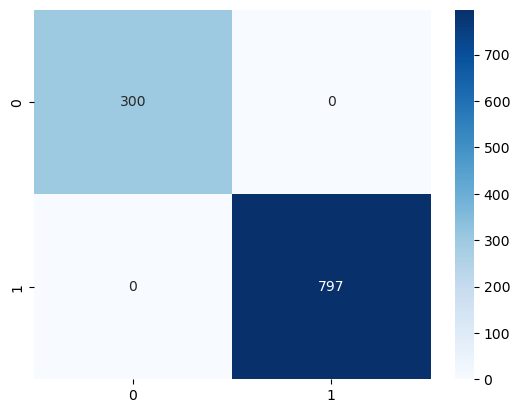

In [ ]:
import seaborn as sns
sns.heatmap(np.array([[300,   0], [  0, 797]]), annot=True, fmt='d', cmap='Blues')

In [ ]:
cluster

hgnc_symbol,RP11-206L10.9,FAM41C,NOC2L,PLEKHN1,HES4,ISG15,AGRN,RNF223,C1orf159,TNFRSF18,...,FAM3A,G6PD,IKBKG,DKC1,MPP1,F8A1,F8,FUNDC2,VBP1,cluster
19339,1.847656,1.847656,1.847656,1.847656,1.847656,1.847656,1.847656,1.847656,1.847656,1.847656,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19355
19175,2.226562,2.226562,2.226562,2.226562,2.226562,2.226562,2.226562,2.226562,2.226562,2.226562,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19355
19092,1.792969,1.792969,1.792969,1.792969,1.792969,1.792969,1.792969,1.792969,1.792969,1.792969,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19355
18821,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19355
18869,1.882812,1.882812,1.882812,1.882812,1.882812,1.882812,1.882812,1.882812,1.882812,1.882812,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,19355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19894,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20172
19917,2.832031,2.832031,2.832031,2.832031,2.832031,2.832031,2.832031,2.832031,2.832031,2.832031,...,4.925781,4.925781,4.925781,4.925781,4.925781,4.925781,4.925781,4.925781,4.925781,20172
20094,3.960938,3.960938,3.960938,3.960938,3.960938,3.960938,3.960938,3.960938,3.960938,3.960938,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,20172
20124,1.089844,1.089844,1.089844,1.089844,1.089844,1.089844,1.089844,1.089844,1.089844,1.089844,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20172


In [ ]:
log_scDNA_arr.shape

(384, 10460)

In [ ]:
scDNA_arr

NameError: name 'scDNA_arr' is not defined

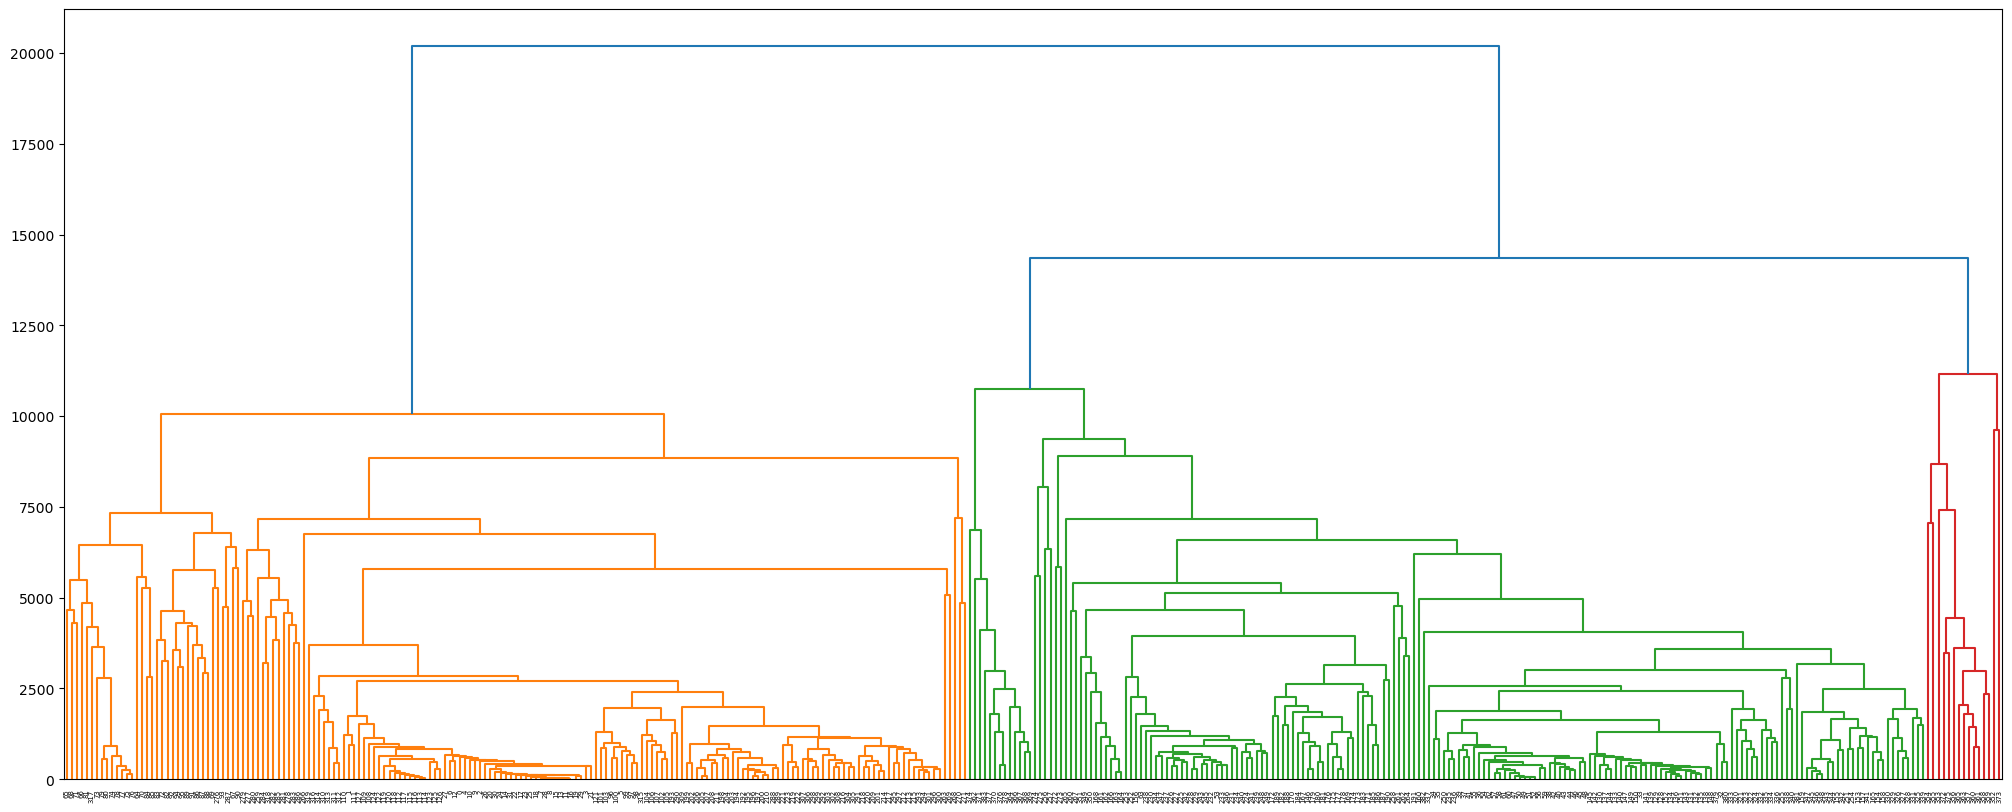

In [ ]:
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
distMat = distance.pdist(log_scDNA_arr, 'minkowski', p=1.)
Z = linkage(distMat, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [ ]:
test_label = pd.DataFrame({'original':cluster['cluster']})
test_label

,original
19339,19355
19175,19355
19092,19355
18821,19355
18869,19355
...,...
19894,20172
19917,20172
20094,20172
20124,20172


In [ ]:
from scipy.cluster.hierarchy import fcluster
test_label['pred2class'] = fcluster(Z, 2, criterion='maxclust')
test_label['pred3class'] = fcluster(Z, 3, criterion='maxclust')
test_label['pred4class'] = fcluster(Z, 4, criterion='maxclust')
test_label['pred5class'] = fcluster(Z, 5, criterion='maxclust')
test_label['pred6class'] = fcluster(Z, 6, criterion='maxclust')
test_label['pred7class'] = fcluster(Z, 7, criterion='maxclust')
test_label['pred8class'] = fcluster(Z, 8, criterion='maxclust')
test_label['pred9class'] = fcluster(Z, 9, criterion='maxclust')
test_label['pred10class'] = fcluster(Z, 10, criterion='maxclust')
test_label['pred11class'] = fcluster(Z, 11, criterion='maxclust')
test_label['pred12class'] = fcluster(Z, 12, criterion='maxclust')
test_label['pred13class'] = fcluster(Z, 13, criterion='maxclust')
test_label['pred14class'] = fcluster(Z, 14, criterion='maxclust')
test_label['pred15class'] = fcluster(Z, 15, criterion='maxclust')
test_label['pred16class'] = fcluster(Z, 16, criterion='maxclust')
test_label['pred17class'] = fcluster(Z, 17, criterion='maxclust')
test_label['pred18class'] = fcluster(Z, 18, criterion='maxclust')
test_label['pred19class'] = fcluster(Z, 19, criterion='maxclust')
test_label['pred20class'] = fcluster(Z, 20, criterion='maxclust')
test_label['pred21class'] = fcluster(Z, 21, criterion='maxclust')

In [ ]:
test_label.to_csv('test_label.csv')

In [ ]:
from collections import Counter
for clunm in ['19355', '19885', '20062','19384', '19935', '20089', '19477', '19963', '20143', '19844', '20024', '20172']:
    sel = test_label.loc[test_label.loc[:, 'original'] == clunm]
    print(clunm)
    for i in range(1, 20):
        print(str(i+1)+' classes', Counter(sel.iloc[:, i]))

19355
2 classes Counter({1: 32})
3 classes Counter({1: 32})
4 classes Counter({1: 32})
5 classes Counter({1: 32})
6 classes Counter({2: 32})
7 classes Counter({2: 32})
8 classes Counter({2: 32})
9 classes Counter({2: 32})
10 classes Counter({2: 32})
11 classes Counter({2: 32})
12 classes Counter({2: 32})
13 classes Counter({2: 32})
14 classes Counter({3: 32})
15 classes Counter({3: 32})
16 classes Counter({3: 32})
17 classes Counter({4: 32})
18 classes Counter({4: 32})
19 classes Counter({4: 32})
20 classes Counter({5: 32})
19885
2 classes Counter({2: 32})
3 classes Counter({2: 32})
4 classes Counter({2: 32})
5 classes Counter({3: 32})
6 classes Counter({4: 32})
7 classes Counter({4: 32})
8 classes Counter({5: 32})
9 classes Counter({6: 32})
10 classes Counter({7: 32})
11 classes Counter({7: 32})
12 classes Counter({8: 32})
13 classes Counter({8: 32})
14 classes Counter({9: 32})
15 classes Counter({10: 32})
16 classes Counter({10: 32})
17 classes Counter({11: 32})
18 classes Counter({1

In [ ]:
for i in range(1, 20):
    print(str(i+1)+' classes', Counter(test_label.iloc[:, i]))

2 classes Counter({2: 205, 1: 179})
3 classes Counter({2: 190, 1: 179, 3: 15})
4 classes Counter({2: 190, 1: 179, 3: 13, 4: 2})
5 classes Counter({1: 179, 3: 177, 4: 13, 2: 13, 5: 2})
6 classes Counter({4: 177, 2: 144, 1: 35, 5: 13, 3: 13, 6: 2})
7 classes Counter({4: 177, 2: 144, 1: 35, 5: 13, 3: 13, 6: 1, 7: 1})
8 classes Counter({5: 173, 2: 144, 1: 35, 6: 13, 3: 13, 4: 4, 7: 1, 8: 1})
9 classes Counter({6: 171, 2: 144, 1: 35, 7: 13, 3: 13, 4: 4, 5: 2, 8: 1, 9: 1})
10 classes Counter({7: 171, 2: 141, 1: 35, 8: 13, 4: 13, 5: 4, 3: 3, 6: 2, 9: 1, 10: 1})
11 classes Counter({7: 171, 2: 141, 1: 35, 4: 13, 9: 11, 5: 4, 3: 3, 6: 2, 8: 2, 10: 1, 11: 1})
12 classes Counter({8: 171, 2: 141, 1: 35, 4: 13, 10: 11, 3: 3, 6: 2, 7: 2, 5: 2, 9: 2, 11: 1, 12: 1})
13 classes Counter({8: 171, 2: 141, 1: 35, 4: 13, 10: 10, 3: 3, 6: 2, 7: 2, 5: 2, 9: 2, 12: 1, 11: 1, 13: 1})
14 classes Counter({9: 171, 3: 141, 1: 18, 2: 17, 5: 13, 11: 10, 4: 3, 7: 2, 8: 2, 6: 2, 10: 2, 13: 1, 12: 1, 14: 1})
15 classes C

In [ ]:
np.where(test_label.loc[:, 'original'] == '19885')[0]

array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [ ]:
sel

,original,pred2class,pred3class,pred4class,pred5class,pred6class,pred7class,pred8class,pred9class,pred10class,...,pred12class,pred13class,pred14class,pred15class,pred16class,pred17class,pred18class,pred19class,pred20class,pred21class
20170,20172,1,1,1,2,2,3,3,4,4,...,5,6,7,7,8,9,10,11,12,13
20167,20172,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
2625,20172,2,3,4,5,5,6,6,7,8,...,10,11,12,13,14,15,16,17,18,19
6395,20172,2,3,4,5,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
6072,20172,2,2,3,4,4,5,5,6,7,...,9,10,11,12,13,14,15,16,17,18
20135,20172,2,2,3,4,4,5,5,6,7,...,8,9,10,11,12,13,14,15,16,17
4452,20172,2,2,3,4,4,5,5,6,7,...,8,9,10,11,12,13,14,15,16,17
2529,20172,2,2,3,4,4,5,5,6,7,...,8,9,10,11,12,13,14,15,16,17
20051,20172,2,2,3,4,4,5,5,6,7,...,8,9,10,11,12,13,14,15,16,17
20048,20172,2,2,3,4,4,5,5,6,7,...,8,9,10,11,12,13,14,15,16,17
